<a href="https://colab.research.google.com/github/nalrob/Aprendizaje-Automatico/blob/main/CTRCD_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install scikit-learn==0.24.2  # versión compatible con eli5
!pip install eli5==0.11.0  # última versión conocida estable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             f1_score, precision_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.metaestimators import available_if

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
uploaded= files.upload()

Saving cardiotox.zip to cardiotox.zip


In [ ]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [ ]:
### SOLO historial clinico

import pandas as pd

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            # Process the first line to extract titles
            titles = lineas[0].strip().split(';')

            # Process the missing lines
            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    # Create a dataframe w results & add titles
    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    # Devolver los valores de las 27 primeras columnas
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58,151,1,619,0,"60,24096386","0,8","3,8",...,,,,,,,,,,
1,94,75,66,150,0,1884,0,"66,27403031","1,093170204","3,463273568",...,0,0,0,0,0,0,0,0,0,0
2,96,53,55,149,0,1830,0,70,"0,661084178","2,894431584",...,,,,,,,,,,
3,58,67,50,"162,5",1,820,0,"56,54077998","0,798487967","3,439739698",...,,,,,,,,,,
4,76,59,70,159,0,2276,0,"67,21281916","0,73427974","2,698600354",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58,"158,5",0,392,0,"67,34021706","0,849898211","2,604906554",...,0,0,0,0,0,0,0,0,0,0
527,77,42,102,163,0,538,0,"73,55165001","1,020905154","2,263032997",...,0,0,0,0,0,0,0,0,0,0
528,80,45,63,171,0,2027,0,"74,78422784","0,808679193","3,376373508",...,0,0,0,0,0,0,0,0,0,0
529,91,53,69,150,0,679,0,"60,81284513","1,078942241","2,571179447",...,,,,,,,,,,


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
data = df[df['AC'] == 1]

In [ ]:
data.columns

Index(['heart_rate', 'age', 'weight', 'height', 'CTRCD', 'time',
       'heart_rhythm', 'LVEF', 'PWT', 'LAd', 'LVDd', 'LVSd', 'AC', 'antiHER2',
       'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev',
       'RTprev', 'CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv'],
      dtype='object')

In [ ]:
#data = data.drop(columns=['AC','LVDd','CIprev','cxvalv','heart_rhythm','ICMprev','ARRprev','VALVprev'])
data = data.drop(columns=['AC','LVDd','CIprev','cxvalv','heart_rhythm','ICMprev','ARRprev','VALVprev','antiHER2prev'])
data

,heart_rate,age,weight,height,CTRCD,time,LVEF,PWT,LAd,LVSd,antiHER2,HTA,DL,DM,smoker,exsmoker,ACprev,RTprev
6,74,65,54.0,164.0,1,252,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,69,48,55.0,170.0,0,1836,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10,81,54,73.0,160.0,0,2483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13,85,56,64.0,158.0,0,1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,66,43,80.0,155.0,0,363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,97,40,62.0,0.0,0,591,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,82,37,62.0,161.0,0,198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
525,63,57,60.0,166.0,0,966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
526,69,40,58.0,0.0,0,392,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['CTRCD'].value_counts()


,count
CTRCD,
0,292
1,37


In [ ]:
#feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']
feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']


X=data[feature_names]
y=data['CTRCD']


**1. Random Forest**


Resultados para Random Forest:
Promedio Accuracy: 0.75
Promedio ROC AUC: 0.61
Promedio Recall: 0.25
Promedio F1 Score: 0.21
Promedio Precision: 0.18

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.81, ROC AUC: 0.70, Recall: 0.38, F1 Score: 0.34, Precision: 0.31
Grupo 2 - Accuracy: 0.78, ROC AUC: 0.56, Recall: 0.23, F1 Score: 0.21, Precision: 0.20
Grupo 3 - Accuracy: 0.73, ROC AUC: 0.63, Recall: 0.23, F1 Score: 0.18, Precision: 0.15
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.64, Recall: 0.23, F1 Score: 0.18, Precision: 0.15
Grupo 5 - Accuracy: 0.73, ROC AUC: 0.53, Recall: 0.15, F1 Score: 0.13, Precision: 0.11


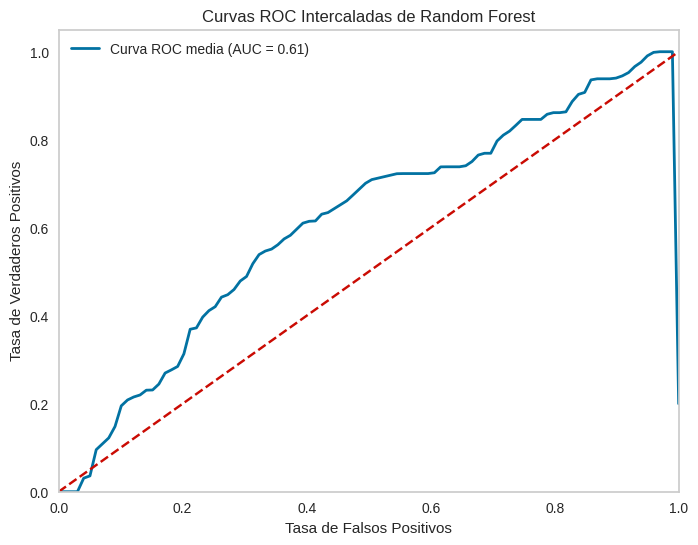

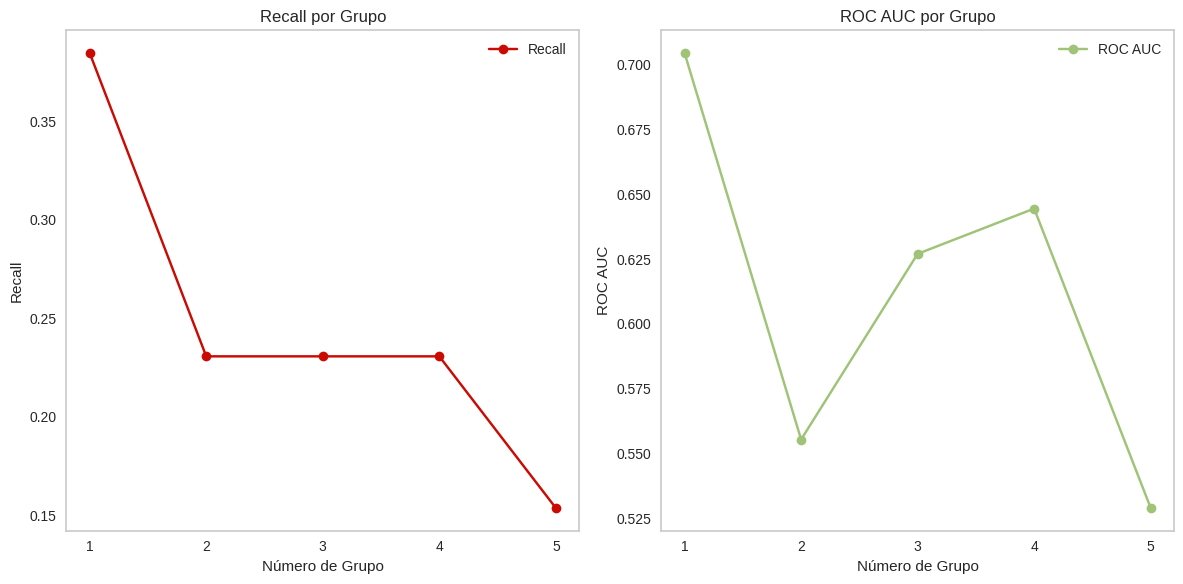


Matriz de confusión para el conjunto de prueba:
[[70 16]
 [11  2]]


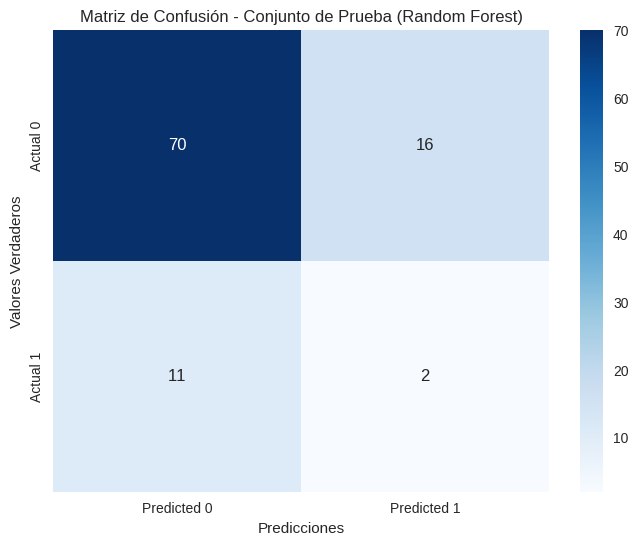


Matriz de confusión para el conjunto de entrenamiento:
[[37  0]
 [ 0 24]]


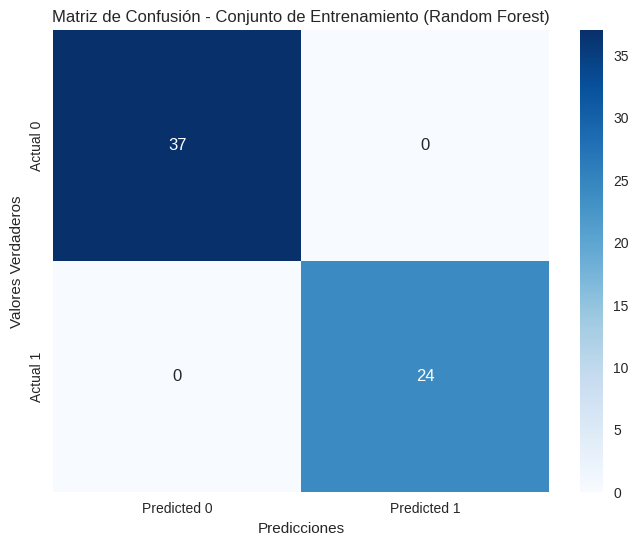

In [ ]:
#random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
#ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

# Modelo de Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (Random Forest)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Calcular la matriz de confusión para el conjunto de entrenamiento
y_train_pred = model.predict(X_train_balanced)

final_cm_train = confusion_matrix(y_train_balanced, y_train_pred)

# Mostrar la matriz de confusión para el conjunto de entrenamiento
print("\nMatriz de confusión para el conjunto de entrenamiento:")
print(final_cm_train)

# Visualización de la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Entrenamiento (Random Forest)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



Resultados para Random Forest:
Promedio Accuracy: 0.71
Promedio ROC AUC: 0.68
Promedio Recall: 0.52
Promedio F1 Score: 0.28
Promedio Precision: 0.19

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.65, ROC AUC: 0.49, Recall: 0.12, F1 Score: 0.08, Precision: 0.06
Grupo 2 - Accuracy: 0.73, ROC AUC: 0.85, Recall: 0.62, F1 Score: 0.36, Precision: 0.25
Grupo 3 - Accuracy: 0.71, ROC AUC: 0.65, Recall: 0.57, F1 Score: 0.30, Precision: 0.20
Grupo 4 - Accuracy: 0.67, ROC AUC: 0.58, Recall: 0.43, F1 Score: 0.21, Precision: 0.14
Grupo 5 - Accuracy: 0.78, ROC AUC: 0.84, Recall: 0.86, F1 Score: 0.46, Precision: 0.32


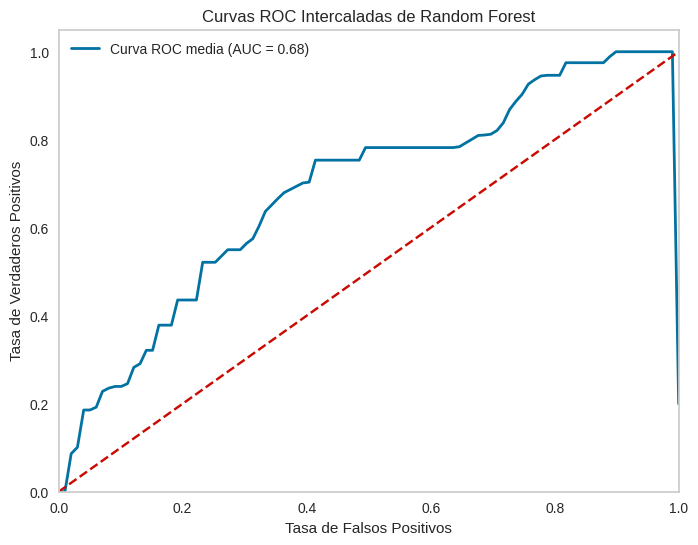

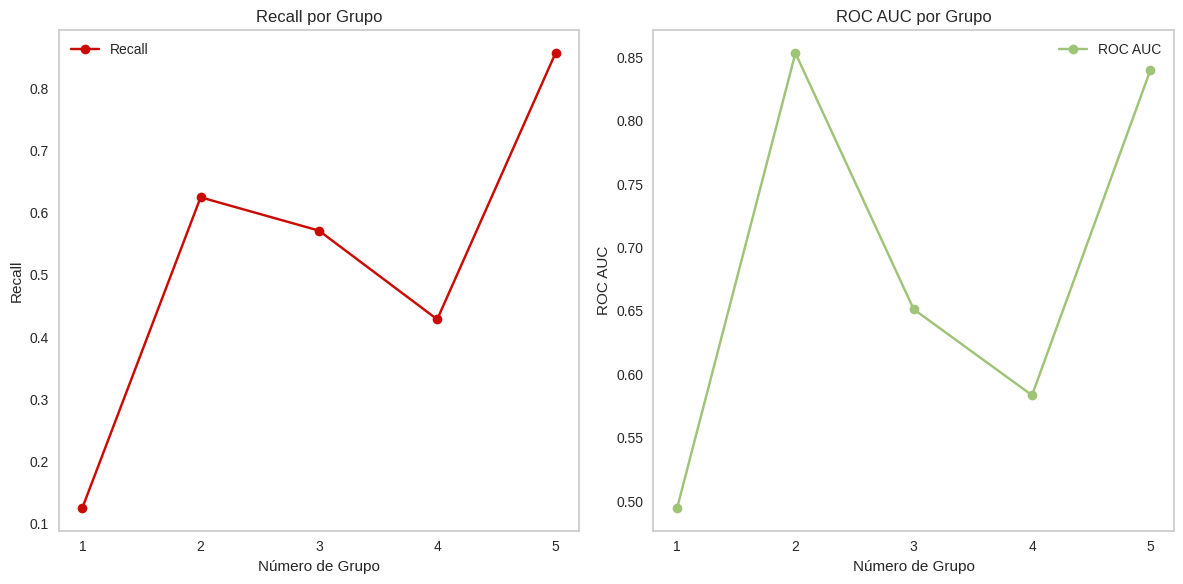


Matriz de confusión para el conjunto de prueba:
[[214  78]
 [ 18  19]]


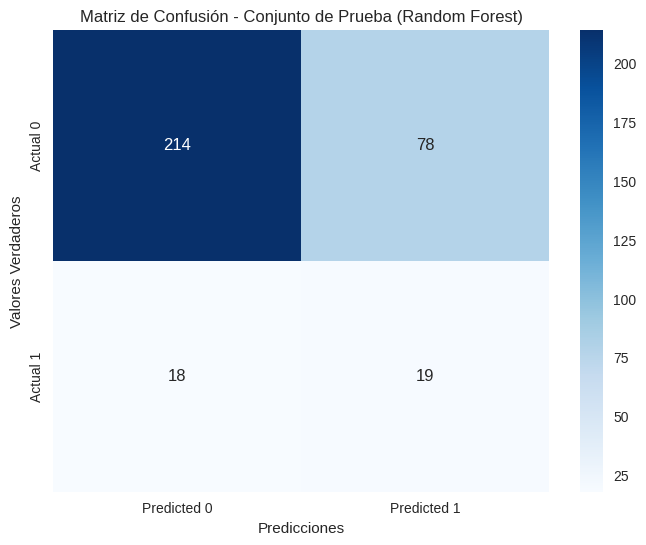

In [ ]:
#VALIDACION CRUZADA

scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']


# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos para la validación cruzada
n_groups = 5

# Modelo Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar validación cruzada (StratifiedKFold para mantener la proporción de clases)
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Almacenar todas las predicciones y etiquetas verdaderas para la matriz de confusión
all_y_test = []
all_y_pred = []
all_fpr = np.linspace(0, 1, 100)  # Para la curva ROC

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Realizar el balanceo de clases como antes
    X_train_0 = X_train_fold[y_train_fold == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train_fold[y_train_fold == 1]  # Muestras de la clase 1 (minoritaria)

    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train_fold[y_train_fold == 1].copy()

    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train_fold.loc[X_train_0_sampled.index]

    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

    # Almacenar las predicciones y las etiquetas verdaderas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(all_y_test, all_y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (Random Forest)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


In [ ]:
# Mostrar resultados de métricas por grupo, incluyendo FPR y Tasa de Error
print("\nResultados de métricas por grupo (incluyendo FPR y Tasa de Error):")
for group_index, result in enumerate(group_results, start=1):
    # Calcular FPR y Tasa de Error para el grupo actual
    cm = confusion_matrix(y_test, model.predict(X_test))  # Matriz de confusión del grupo
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # Tasa de Falsos Positivos
    error_rate = (fp + fn) / len(y_test)  # Tasa de Error

    print(f"Grupo {group_index}:")
    print(f"  - Accuracy:       {result['Accuracy']:.2f}")
    print(f"  - ROC AUC:        {result['ROC AUC']:.2f}")
    print(f"  - Recall (TPR):   {result['Recall']:.2f}")
    print(f"  - FPR:            {fpr:.2f}")
    print(f"  - F1 Score:       {result['F1 Score']:.2f}")
    print(f"  - Precision:      {result['Precision']:.2f}")
    print(f"  - Tasa de Error:  {error_rate:.2f}")
    print("-" * 40)

# Calcular y mostrar promedios generales
print("\nPromedios generales de las métricas:")
print(f"  - Promedio Accuracy:   {np.mean(metrics['accuracy']):.2f}")
print(f"  - Promedio ROC AUC:    {np.mean(metrics['roc_auc']):.2f}")
print(f"  - Promedio Recall:     {np.mean(metrics['recall']):.2f}")
print(f"  - Promedio FPR:        {np.mean([fp / (fp + tn) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")
print(f"  - Promedio F1 Score:   {np.mean(metrics['f1']):.2f}")
print(f"  - Promedio Precision:  {np.mean(metrics['precision']):.2f}")
print(f"  - Promedio Tasa Error: {np.mean([(fp + fn) / len(y_test) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")


Resultados de métricas por grupo (incluyendo FPR y Tasa de Error):
Grupo 1:
  - Accuracy:       0.65
  - ROC AUC:        0.49
  - Recall (TPR):   0.12
  - FPR:            0.22
  - F1 Score:       0.08
  - Precision:      0.06
  - Tasa de Error:  0.19
----------------------------------------
Grupo 2:
  - Accuracy:       0.73
  - ROC AUC:        0.85
  - Recall (TPR):   0.62
  - FPR:            0.22
  - F1 Score:       0.36
  - Precision:      0.25
  - Tasa de Error:  0.19
----------------------------------------
Grupo 3:
  - Accuracy:       0.71
  - ROC AUC:        0.65
  - Recall (TPR):   0.57
  - FPR:            0.22
  - F1 Score:       0.30
  - Precision:      0.20
  - Tasa de Error:  0.19
----------------------------------------
Grupo 4:
  - Accuracy:       0.67
  - ROC AUC:        0.58
  - Recall (TPR):   0.43
  - FPR:            0.22
  - F1 Score:       0.21
  - Precision:      0.14
  - Tasa de Error:  0.19
----------------------------------------
Grupo 5:
  - Accuracy:       0.7

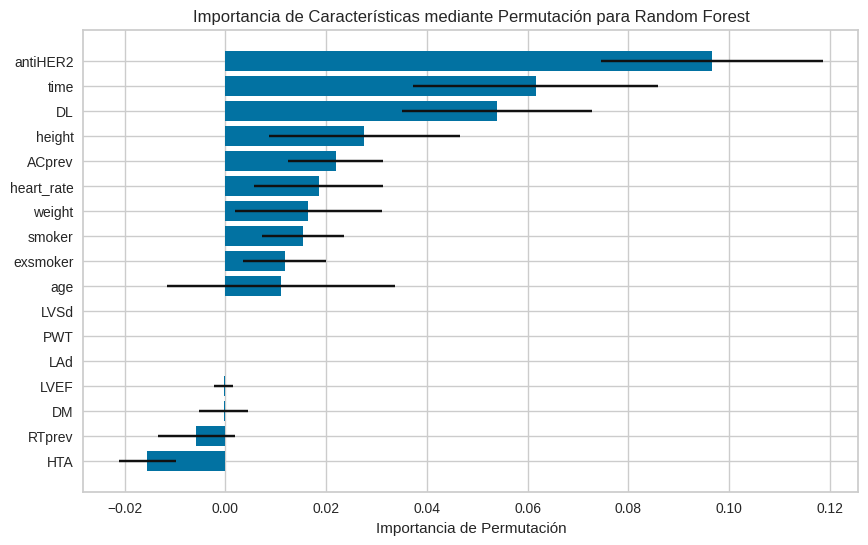

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Random Forest")
plt.show()

**2. Naive Bayes**


Resultados para Naive Bayes:
Promedio Accuracy: 0.35
Promedio ROC AUC: 0.64
Promedio Recall: 0.89
Promedio F1 Score: 0.26
Promedio Precision: 0.16

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.35, ROC AUC: 0.67, Recall: 0.92, F1 Score: 0.27, Precision: 0.16
Grupo 2 - Accuracy: 0.33, ROC AUC: 0.65, Recall: 0.92, F1 Score: 0.27, Precision: 0.16
Grupo 3 - Accuracy: 0.37, ROC AUC: 0.63, Recall: 0.85, F1 Score: 0.26, Precision: 0.15
Grupo 4 - Accuracy: 0.34, ROC AUC: 0.64, Recall: 0.92, F1 Score: 0.27, Precision: 0.16
Grupo 5 - Accuracy: 0.33, ROC AUC: 0.61, Recall: 0.85, F1 Score: 0.25, Precision: 0.15


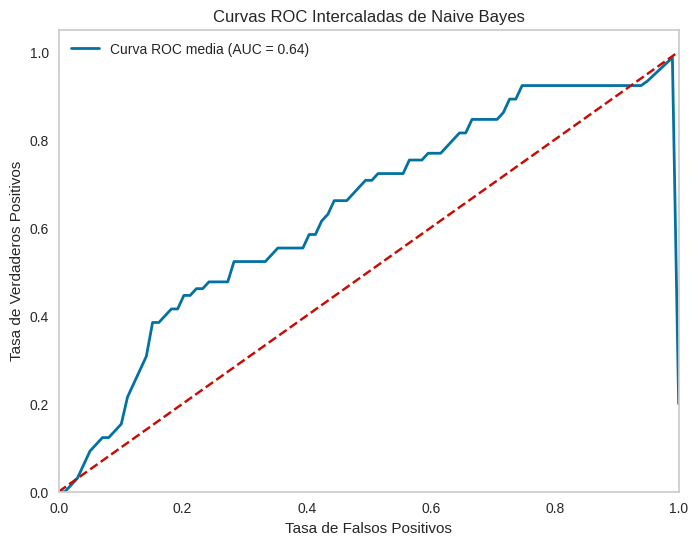

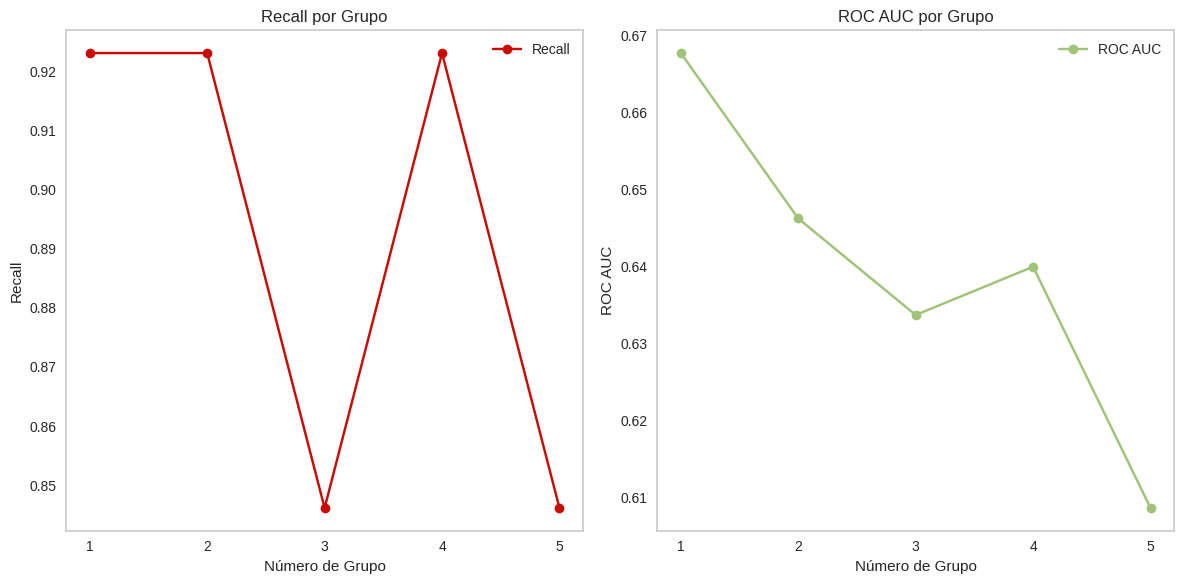


Matriz de confusión total:
[[22 64]
 [ 2 11]]


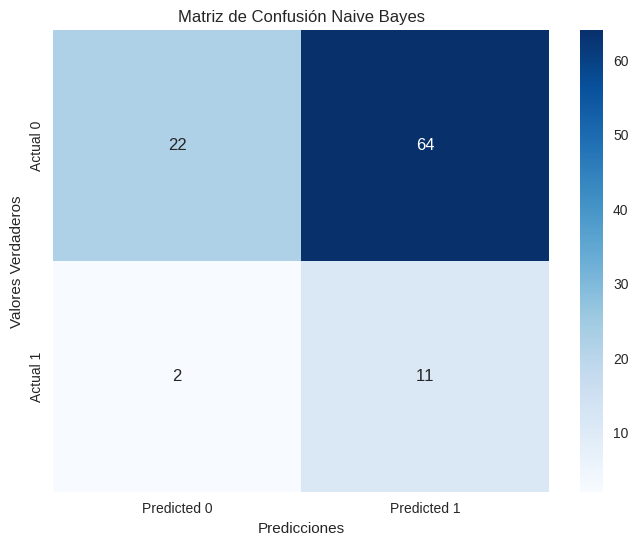

In [ ]:
#Naive bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

# Modelo de Naive Bayes
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB())])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Naive Bayes:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Naive Bayes')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total
final_cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión Naive Bayes')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


In [ ]:
# Mostrar resultados de métricas por grupo, incluyendo FPR y Tasa de Error
print("\nResultados de métricas por grupo (incluyendo FPR y Tasa de Error):")
for group_index, result in enumerate(group_results, start=1):
    # Calcular FPR y Tasa de Error para el grupo actual
    cm = confusion_matrix(y_test, model.predict(X_test))  # Matriz de confusión del grupo
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # Tasa de Falsos Positivos
    error_rate = (fp + fn) / len(y_test)  # Tasa de Error

    print(f"Grupo {group_index}:")
    print(f"  - Accuracy:       {result['Accuracy']:.2f}")
    print(f"  - ROC AUC:        {result['ROC AUC']:.2f}")
    print(f"  - Recall (TPR):   {result['Recall']:.2f}")
    print(f"  - FPR:            {fpr:.2f}")
    print(f"  - F1 Score:       {result['F1 Score']:.2f}")
    print(f"  - Precision:      {result['Precision']:.2f}")
    print(f"  - Tasa de Error:  {error_rate:.2f}")
    print("-" * 40)

# Calcular y mostrar promedios generales
print("\nPromedios generales de las métricas:")
print(f"  - Promedio Accuracy:   {np.mean(metrics['accuracy']):.2f}")
print(f"  - Promedio ROC AUC:    {np.mean(metrics['roc_auc']):.2f}")
print(f"  - Promedio Recall:     {np.mean(metrics['recall']):.2f}")
print(f"  - Promedio FPR:        {np.mean([fp / (fp + tn) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")
print(f"  - Promedio F1 Score:   {np.mean(metrics['f1']):.2f}")
print(f"  - Promedio Precision:  {np.mean(metrics['precision']):.2f}")
print(f"  - Promedio Tasa Error: {np.mean([(fp + fn) / len(y_test) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")



Resultados de métricas por grupo (incluyendo FPR y Tasa de Error):
Grupo 1:
  - Accuracy:       0.35
  - ROC AUC:        0.67
  - Recall (TPR):   0.92
  - FPR:            0.74
  - F1 Score:       0.27
  - Precision:      0.16
  - Tasa de Error:  0.67
----------------------------------------
Grupo 2:
  - Accuracy:       0.33
  - ROC AUC:        0.65
  - Recall (TPR):   0.92
  - FPR:            0.74
  - F1 Score:       0.27
  - Precision:      0.16
  - Tasa de Error:  0.67
----------------------------------------
Grupo 3:
  - Accuracy:       0.37
  - ROC AUC:        0.63
  - Recall (TPR):   0.85
  - FPR:            0.74
  - F1 Score:       0.26
  - Precision:      0.15
  - Tasa de Error:  0.67
----------------------------------------
Grupo 4:
  - Accuracy:       0.34
  - ROC AUC:        0.64
  - Recall (TPR):   0.92
  - FPR:            0.74
  - F1 Score:       0.27
  - Precision:      0.16
  - Tasa de Error:  0.67
----------------------------------------
Grupo 5:
  - Accuracy:       0.3

**3. KNN**


Resultados para KNN:
Promedio Accuracy: 0.78
Promedio ROC AUC: 0.65
Promedio Recall: 0.29
Promedio F1 Score: 0.25
Promedio Precision: 0.23

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.82, ROC AUC: 0.71, Recall: 0.38, F1 Score: 0.36, Precision: 0.33
Grupo 2 - Accuracy: 0.73, ROC AUC: 0.66, Recall: 0.46, F1 Score: 0.31, Precision: 0.23
Grupo 3 - Accuracy: 0.81, ROC AUC: 0.62, Recall: 0.15, F1 Score: 0.17, Precision: 0.20
Grupo 4 - Accuracy: 0.79, ROC AUC: 0.62, Recall: 0.31, F1 Score: 0.28, Precision: 0.25
Grupo 5 - Accuracy: 0.78, ROC AUC: 0.63, Recall: 0.15, F1 Score: 0.15, Precision: 0.15


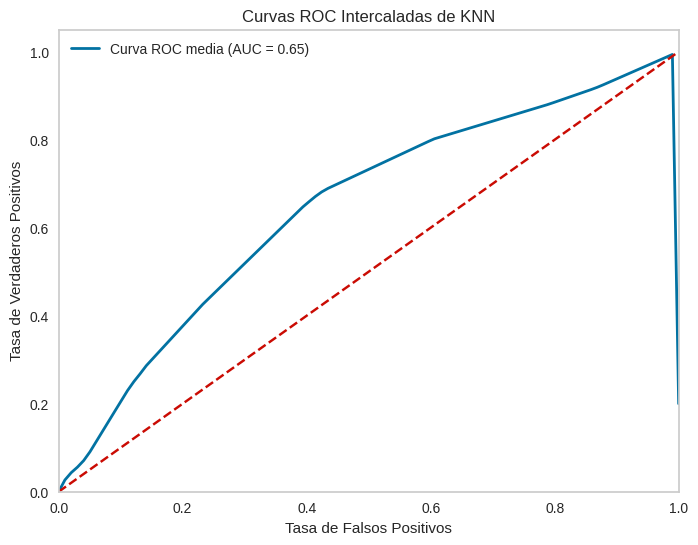

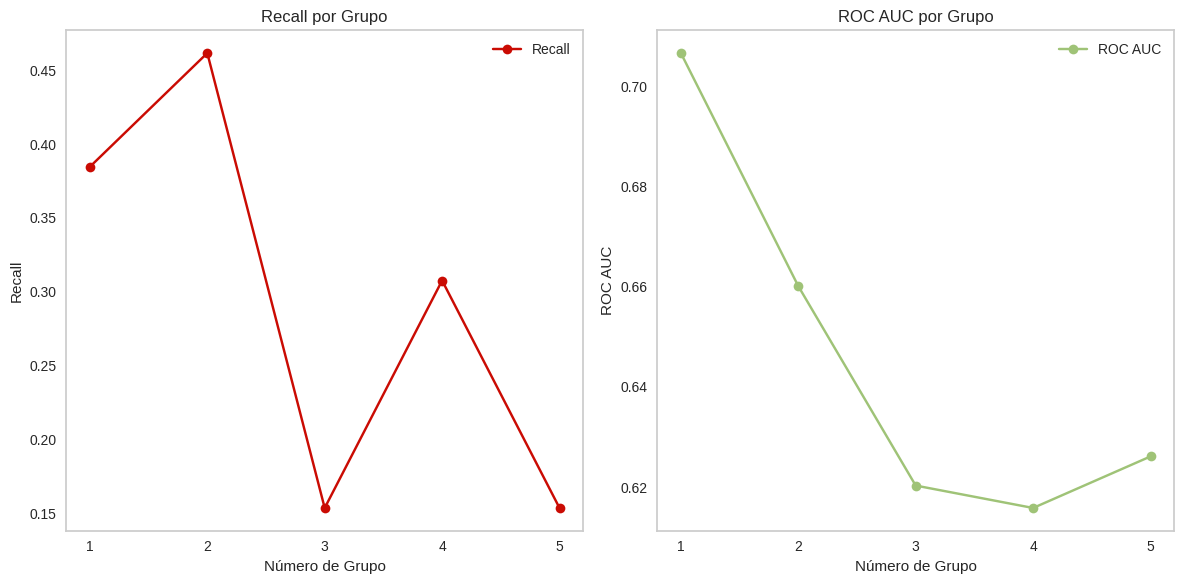


Matriz de confusión para el conjunto de prueba:
[[75 11]
 [11  2]]


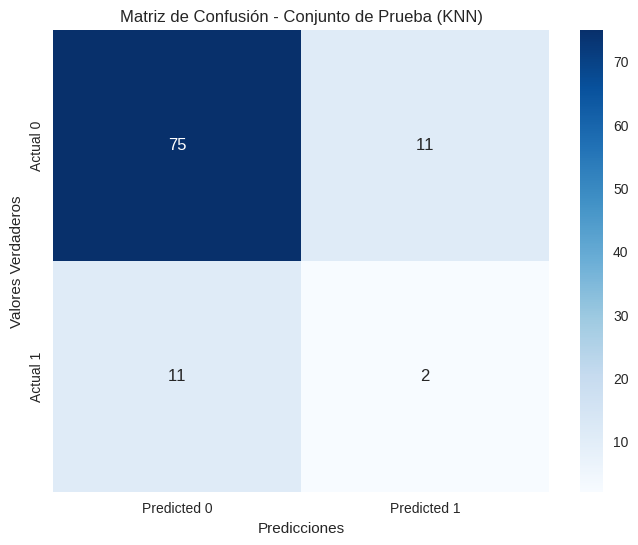


Matriz de confusión para el conjunto de entrenamiento:
[[34  3]
 [13 11]]


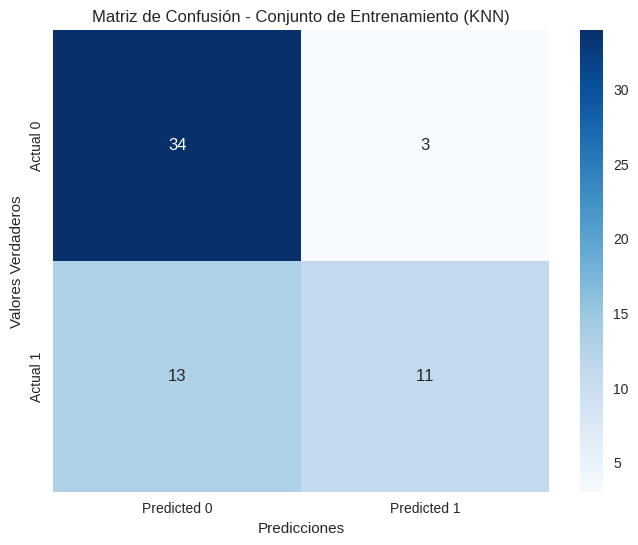

In [ ]:
#KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
#ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2','DL', 'DM', 'smoker','ACprev','exsmoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

# Modelo KNN
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para KNN:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (KNN)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Calcular la matriz de confusión para el conjunto de entrenamiento
y_train_pred = model.predict(X_train_balanced)

final_cm_train = confusion_matrix(y_train_balanced, y_train_pred)

# Mostrar la matriz de confusión para el conjunto de entrenamiento
print("\nMatriz de confusión para el conjunto de entrenamiento:")
print(final_cm_train)

# Visualización de la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Entrenamiento (KNN)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



Resultados para KNN:
Promedio Accuracy: 0.72
Promedio ROC AUC: 0.65
Promedio Recall: 0.41
Promedio F1 Score: 0.25
Promedio Precision: 0.18

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.70, ROC AUC: 0.51, Recall: 0.12, F1 Score: 0.09, Precision: 0.07
Grupo 2 - Accuracy: 0.65, ROC AUC: 0.59, Recall: 0.38, F1 Score: 0.21, Precision: 0.14
Grupo 3 - Accuracy: 0.80, ROC AUC: 0.72, Recall: 0.57, F1 Score: 0.38, Precision: 0.29
Grupo 4 - Accuracy: 0.68, ROC AUC: 0.67, Recall: 0.57, F1 Score: 0.28, Precision: 0.18
Grupo 5 - Accuracy: 0.75, ROC AUC: 0.74, Recall: 0.43, F1 Score: 0.27, Precision: 0.20


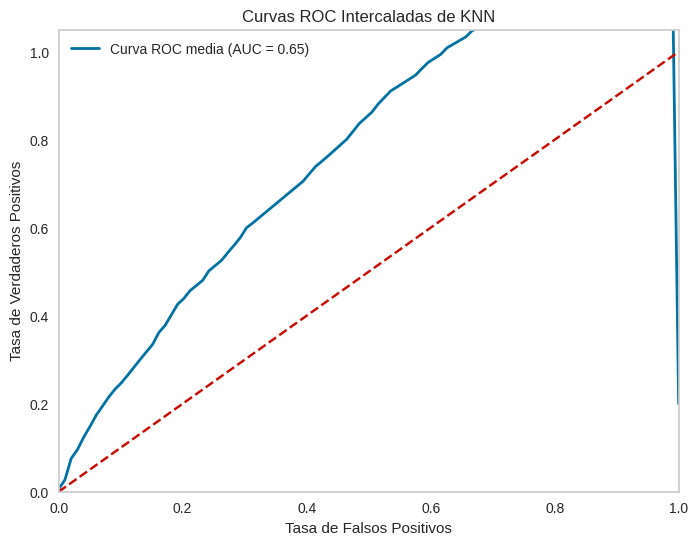

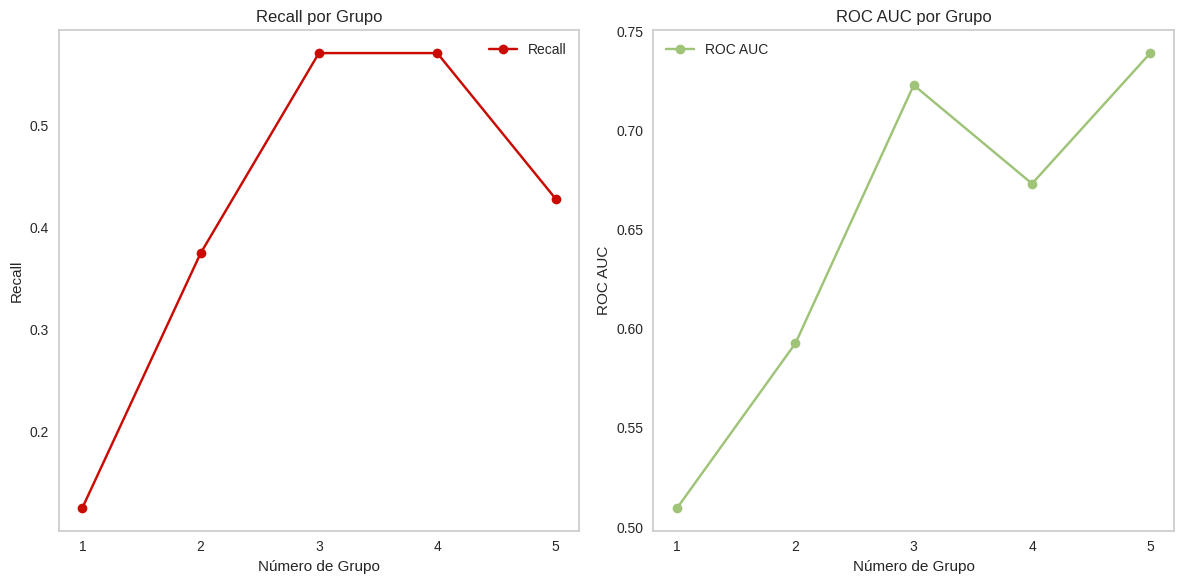


Matriz de confusión para el conjunto de prueba:
[[221  71]
 [ 22  15]]


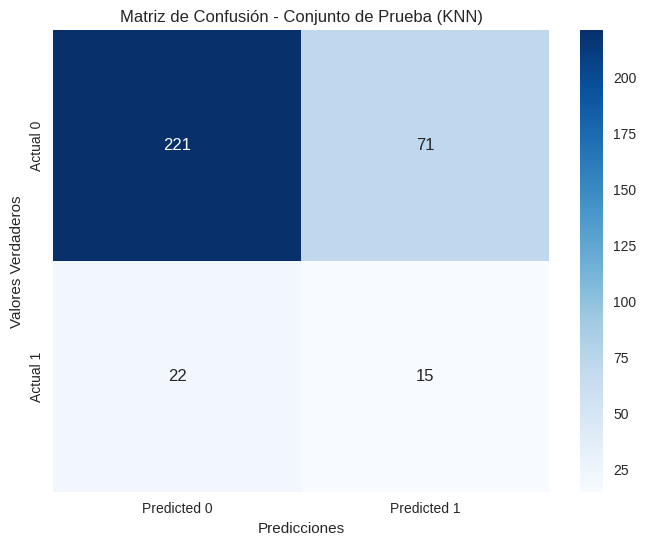

In [ ]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos para la validación cruzada
n_groups = 5

# Modelo KNN
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar validación cruzada (StratifiedKFold para mantener la proporción de clases)
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Almacenar todas las predicciones y etiquetas verdaderas para la matriz de confusión
all_y_test = []
all_y_pred = []

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Realizar el balanceo de clases como antes
    X_train_0 = X_train_fold[y_train_fold == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train_fold[y_train_fold == 1]  # Muestras de la clase 1 (minoritaria)

    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train_fold[y_train_fold == 1].copy()

    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train_fold.loc[X_train_0_sampled.index]

    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

    # Almacenar las predicciones y las etiquetas verdaderas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para KNN:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(all_y_test, all_y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (KNN)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


In [ ]:
# Mostrar resultados de métricas por grupo, incluyendo FPR y Tasa de Error
print("\nResultados de métricas por grupo (incluyendo FPR y Tasa de Error):")
for group_index, result in enumerate(group_results, start=1):
    # Calcular FPR y Tasa de Error para el grupo actual
    cm = confusion_matrix(y_test, model.predict(X_test))  # Matriz de confusión del grupo
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # Tasa de Falsos Positivos
    error_rate = (fp + fn) / len(y_test)  # Tasa de Error

    print(f"Grupo {group_index}:")
    print(f"  - Accuracy:       {result['Accuracy']:.2f}")
    print(f"  - ROC AUC:        {result['ROC AUC']:.2f}")
    print(f"  - Recall (TPR):   {result['Recall']:.2f}")
    print(f"  - FPR:            {fpr:.2f}")
    print(f"  - F1 Score:       {result['F1 Score']:.2f}")
    print(f"  - Precision:      {result['Precision']:.2f}")
    print(f"  - Tasa de Error:  {error_rate:.2f}")
    print("-" * 40)

# Calcular y mostrar promedios generales
print("\nPromedios generales de las métricas:")
print(f"  - Promedio Accuracy:   {np.mean(metrics['accuracy']):.2f}")
print(f"  - Promedio ROC AUC:    {np.mean(metrics['roc_auc']):.2f}")
print(f"  - Promedio Recall:     {np.mean(metrics['recall']):.2f}")
print(f"  - Promedio FPR:        {np.mean([fp / (fp + tn) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")
print(f"  - Promedio F1 Score:   {np.mean(metrics['f1']):.2f}")
print(f"  - Promedio Precision:  {np.mean(metrics['precision']):.2f}")
print(f"  - Promedio Tasa Error: {np.mean([(fp + fn) / len(y_test) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")




Resultados de métricas por grupo (incluyendo FPR y Tasa de Error):
Grupo 1:
  - Accuracy:       0.70
  - ROC AUC:        0.51
  - Recall (TPR):   0.12
  - FPR:            0.33
  - F1 Score:       0.09
  - Precision:      0.07
  - Tasa de Error:  0.32
----------------------------------------
Grupo 2:
  - Accuracy:       0.65
  - ROC AUC:        0.59
  - Recall (TPR):   0.38
  - FPR:            0.33
  - F1 Score:       0.21
  - Precision:      0.14
  - Tasa de Error:  0.32
----------------------------------------
Grupo 3:
  - Accuracy:       0.80
  - ROC AUC:        0.72
  - Recall (TPR):   0.57
  - FPR:            0.33
  - F1 Score:       0.38
  - Precision:      0.29
  - Tasa de Error:  0.32
----------------------------------------
Grupo 4:
  - Accuracy:       0.68
  - ROC AUC:        0.67
  - Recall (TPR):   0.57
  - FPR:            0.33
  - F1 Score:       0.28
  - Precision:      0.18
  - Tasa de Error:  0.32
----------------------------------------
Grupo 5:
  - Accuracy:       0.7

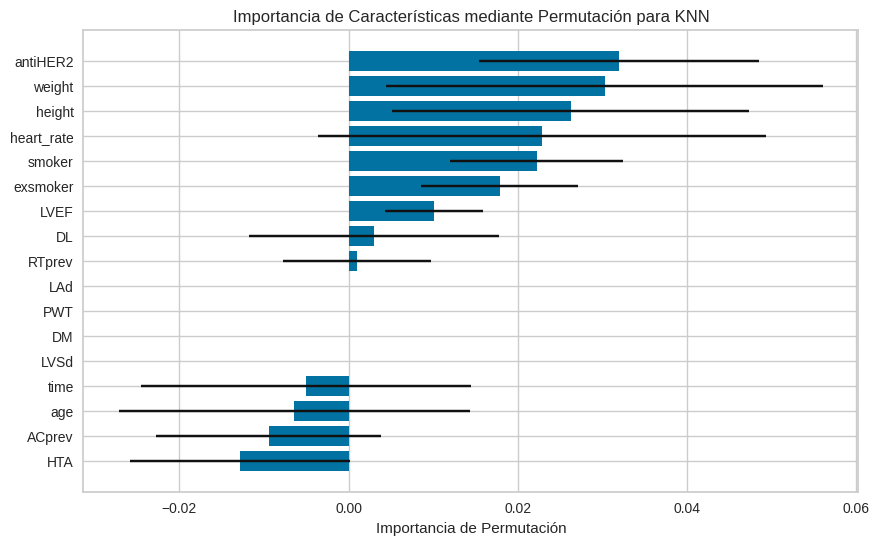

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para KNN")
plt.show()

In [ ]:
#Permutation importance con KNN
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0424 ± 0.0198,antiHER2
0.0222 ± 0.0348,weight
0.0222 ± 0.0236,smoker
0.0121 ± 0.0323,heart_rate
0.0121 ± 0.0236,exsmoker
0.0121 ± 0.0348,height
0.0081 ± 0.0151,LVEF
0 ± 0.0000,LAd
0 ± 0.0000,PWT
0 ± 0.0000,LVSd


**4. Logistic Regression**


Resultados para Regresión Logística:
Promedio Accuracy: 0.72
Promedio ROC AUC: 0.63
Promedio Recall: 0.42
Promedio F1 Score: 0.28
Promedio Precision: 0.21

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.70, ROC AUC: 0.68, Recall: 0.38, F1 Score: 0.25, Precision: 0.19
Grupo 2 - Accuracy: 0.69, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.24, Precision: 0.18
Grupo 3 - Accuracy: 0.74, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.28, Precision: 0.22
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.67, Recall: 0.54, F1 Score: 0.34, Precision: 0.25
Grupo 5 - Accuracy: 0.73, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.27, Precision: 0.21


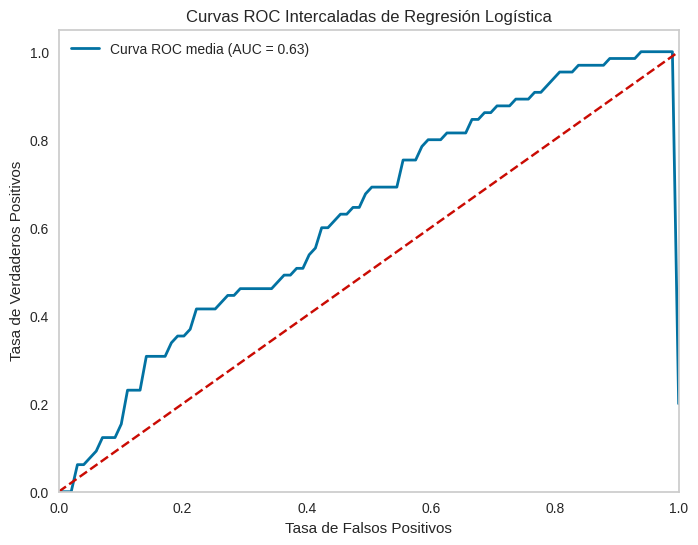

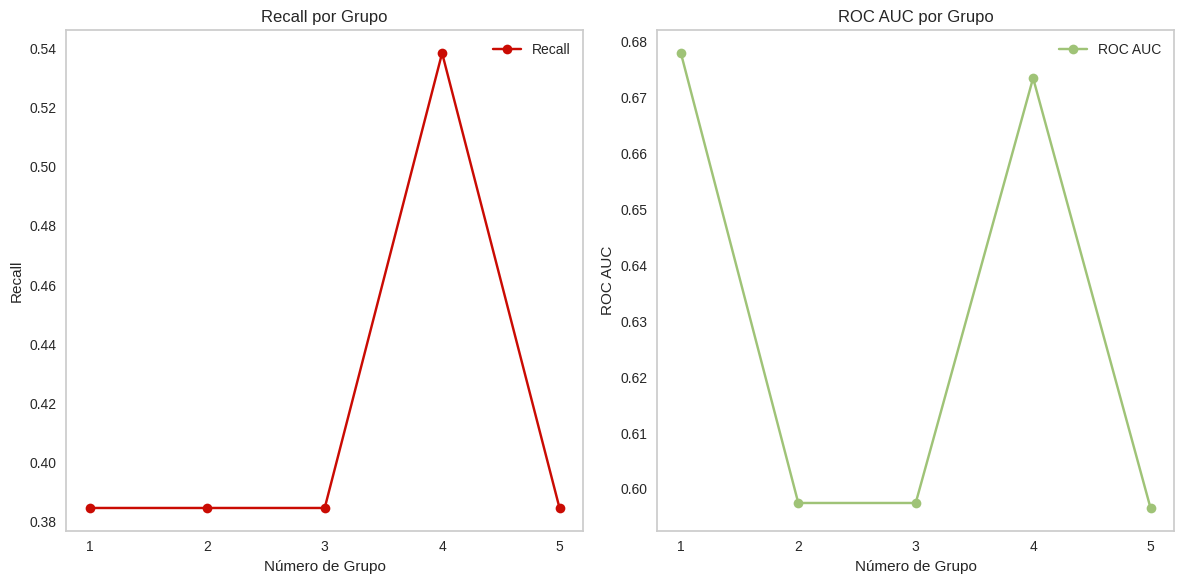


Matriz de confusión para el conjunto de prueba:
[[67 19]
 [ 8  5]]


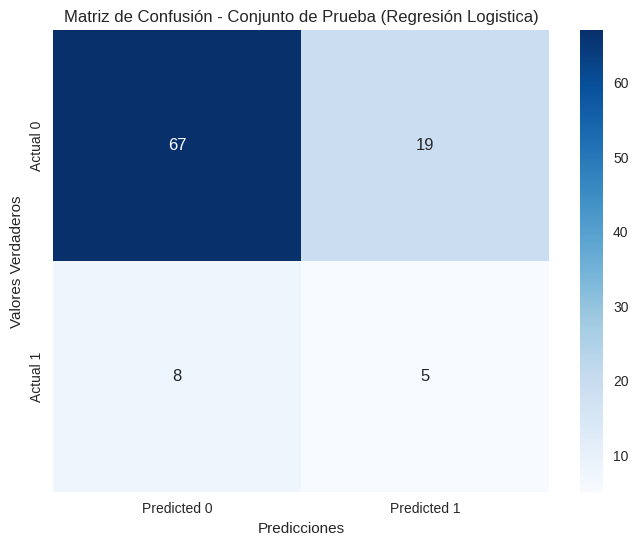


Matriz de confusión para el conjunto de entrenamiento:
[[32  5]
 [11 13]]


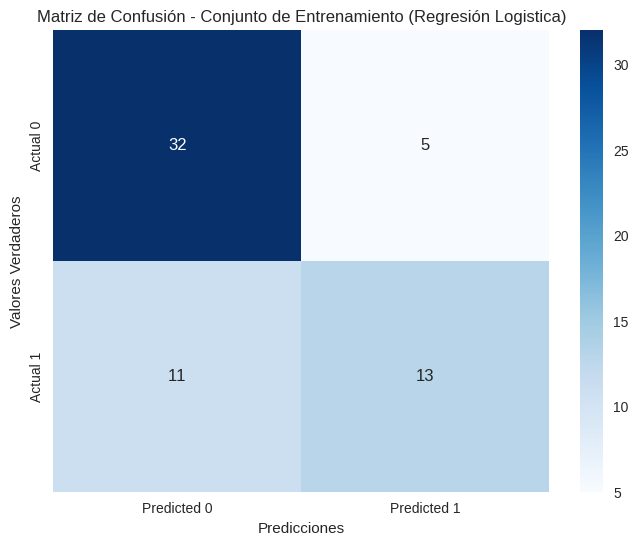

In [ ]:
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

# Modelo de Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (Regresión Logistica)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Calcular la matriz de confusión para el conjunto de entrenamiento
y_train_pred = model.predict(X_train_balanced)

final_cm_train = confusion_matrix(y_train_balanced, y_train_pred)

# Mostrar la matriz de confusión para el conjunto de entrenamiento
print("\nMatriz de confusión para el conjunto de entrenamiento:")
print(final_cm_train)

# Visualización de la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Entrenamiento (Regresión Logistica)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



Resultados para Regresión Logística:
Promedio Accuracy: 0.70
Promedio ROC AUC: 0.66
Promedio Recall: 0.54
Promedio F1 Score: 0.30
Promedio Precision: 0.21

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.68, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.22, Precision: 0.16
Grupo 2 - Accuracy: 0.68, ROC AUC: 0.82, Recall: 0.88, F1 Score: 0.40, Precision: 0.26
Grupo 3 - Accuracy: 0.73, ROC AUC: 0.69, Recall: 0.57, F1 Score: 0.31, Precision: 0.21
Grupo 4 - Accuracy: 0.58, ROC AUC: 0.51, Recall: 0.43, F1 Score: 0.18, Precision: 0.11
Grupo 5 - Accuracy: 0.85, ROC AUC: 0.70, Recall: 0.43, F1 Score: 0.38, Precision: 0.33


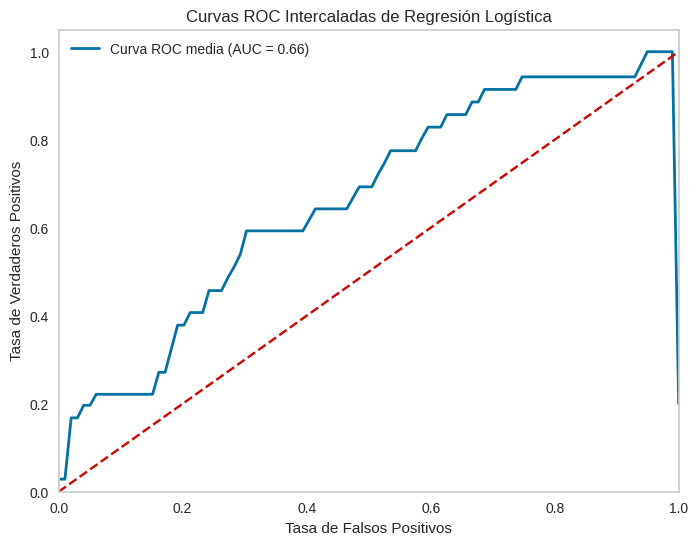

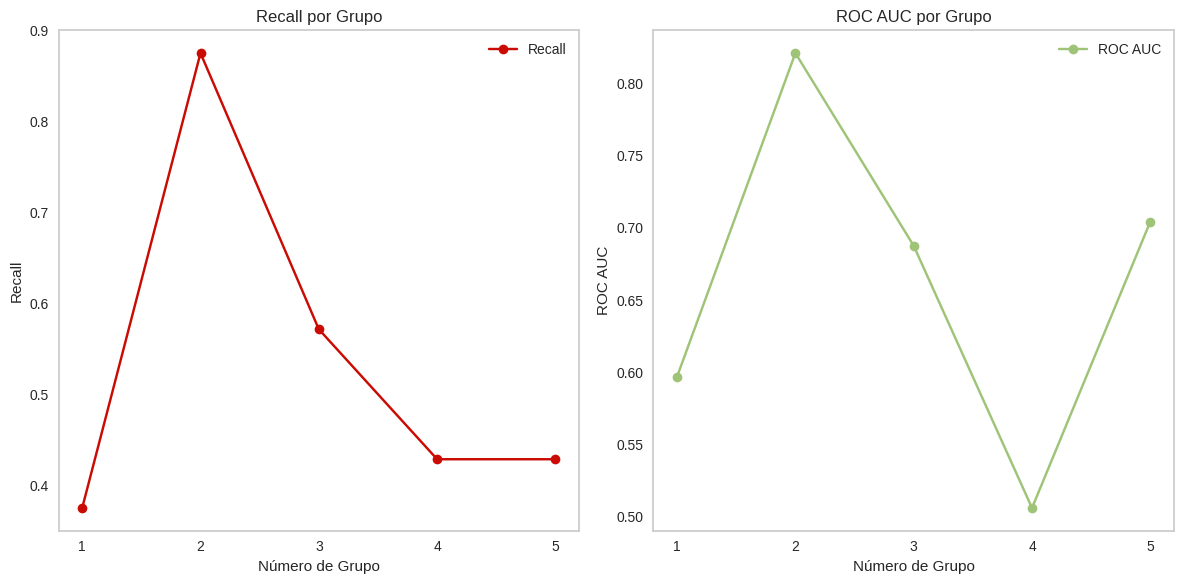


Matriz de confusión para el conjunto de prueba:
[[211  81]
 [ 17  20]]


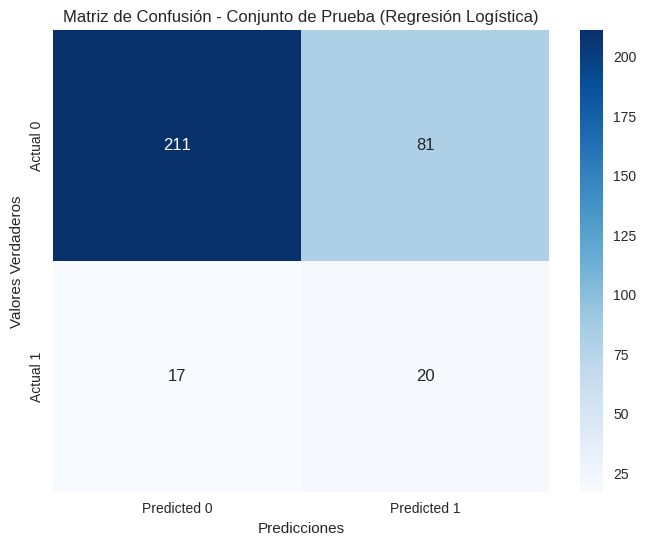

array([[34,  3],
       [13, 11]])

In [ ]:
#con validacion cruzada

from sklearn.model_selection import StratifiedKFold
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos para la validación cruzada
n_groups = 5

# Modelo de Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Inicializar validación cruzada (StratifiedKFold para mantener la proporción de clases)
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Almacenar todas las predicciones y etiquetas verdaderas para la matriz de confusión
all_y_test = []
all_y_pred = []

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Realizar el balanceo de clases como antes
    X_train_0 = X_train_fold[y_train_fold == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train_fold[y_train_fold == 1]  # Muestras de la clase 1 (minoritaria)

    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train_fold[y_train_fold == 1].copy()

    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train_fold.loc[X_train_0_sampled.index]

    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

    # Almacenar las predicciones y las etiquetas verdaderas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(all_y_test, all_y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (Regresión Logística)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Calcular la matriz de confusión para el conjunto de entrenamiento
y_train_pred = model.predict(X_train_balanced)

final_cm_train


In [ ]:
# Mostrar resultados de métricas por grupo, incluyendo FPR y Tasa de Error
print("\nResultados de métricas por grupo (incluyendo FPR y Tasa de Error):")
for group_index, result in enumerate(group_results, start=1):
    # Calcular FPR y Tasa de Error para el grupo actual
    cm = confusion_matrix(y_test, model.predict(X_test))  # Matriz de confusión del grupo
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # Tasa de Falsos Positivos
    error_rate = (fp + fn) / len(y_test)  # Tasa de Error

    print(f"Grupo {group_index}:")
    print(f"  - Accuracy:       {result['Accuracy']:.2f}")
    print(f"  - ROC AUC:        {result['ROC AUC']:.2f}")
    print(f"  - Recall (TPR):   {result['Recall']:.2f}")
    print(f"  - FPR:            {fpr:.2f}")
    print(f"  - F1 Score:       {result['F1 Score']:.2f}")
    print(f"  - Precision:      {result['Precision']:.2f}")
    print(f"  - Tasa de Error:  {error_rate:.2f}")
    print("-" * 40)

# Calcular y mostrar promedios generales
print("\nPromedios generales de las métricas:")
print(f"  - Promedio Accuracy:   {np.mean(metrics['accuracy']):.2f}")
print(f"  - Promedio ROC AUC:    {np.mean(metrics['roc_auc']):.2f}")
print(f"  - Promedio Recall:     {np.mean(metrics['recall']):.2f}")
print(f"  - Promedio FPR:        {np.mean([fp / (fp + tn) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")
print(f"  - Promedio F1 Score:   {np.mean(metrics['f1']):.2f}")
print(f"  - Promedio Precision:  {np.mean(metrics['precision']):.2f}")
print(f"  - Promedio Tasa Error: {np.mean([(fp + fn) / len(y_test) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")



Resultados de métricas por grupo (incluyendo FPR y Tasa de Error):
Grupo 1:
  - Accuracy:       0.68
  - ROC AUC:        0.60
  - Recall (TPR):   0.38
  - FPR:            0.24
  - F1 Score:       0.22
  - Precision:      0.16
  - Tasa de Error:  0.26
----------------------------------------
Grupo 2:
  - Accuracy:       0.68
  - ROC AUC:        0.82
  - Recall (TPR):   0.88
  - FPR:            0.24
  - F1 Score:       0.40
  - Precision:      0.26
  - Tasa de Error:  0.26
----------------------------------------
Grupo 3:
  - Accuracy:       0.73
  - ROC AUC:        0.69
  - Recall (TPR):   0.57
  - FPR:            0.24
  - F1 Score:       0.31
  - Precision:      0.21
  - Tasa de Error:  0.26
----------------------------------------
Grupo 4:
  - Accuracy:       0.58
  - ROC AUC:        0.51
  - Recall (TPR):   0.43
  - FPR:            0.24
  - F1 Score:       0.18
  - Precision:      0.11
  - Tasa de Error:  0.26
----------------------------------------
Grupo 5:
  - Accuracy:       0.8

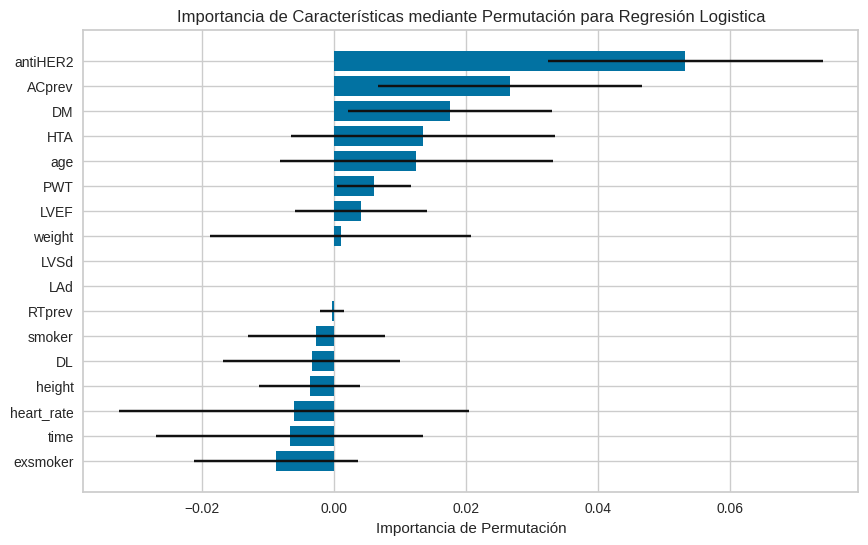

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Regresión Logistica")
plt.show()

In [ ]:
#Permutation importance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0444 ± 0.0302,DL
0.0364 ± 0.0416,smoker
0.0182 ± 0.0081,exsmoker
0.0121 ± 0.0323,ACprev
0.0061 ± 0.0099,antiHER2
0.0040 ± 0.0416,time
0.0040 ± 0.0302,age
0.0020 ± 0.0236,height
0 ± 0.0000,LVSd
0 ± 0.0000,DM


**5. Maquinas de soporte (SVC)**


Resultados para Support Vector Classifier (SVC):
Promedio Accuracy: 0.82
Promedio ROC AUC: 0.66
Promedio Recall: 0.32
Promedio F1 Score: 0.33
Promedio Precision: 0.34

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.86, ROC AUC: 0.67, Recall: 0.38, F1 Score: 0.42, Precision: 0.45
Grupo 2 - Accuracy: 0.76, ROC AUC: 0.69, Recall: 0.31, F1 Score: 0.25, Precision: 0.21
Grupo 3 - Accuracy: 0.86, ROC AUC: 0.67, Recall: 0.31, F1 Score: 0.36, Precision: 0.44
Grupo 4 - Accuracy: 0.81, ROC AUC: 0.67, Recall: 0.31, F1 Score: 0.30, Precision: 0.29
Grupo 5 - Accuracy: 0.82, ROC AUC: 0.61, Recall: 0.31, F1 Score: 0.31, Precision: 0.31


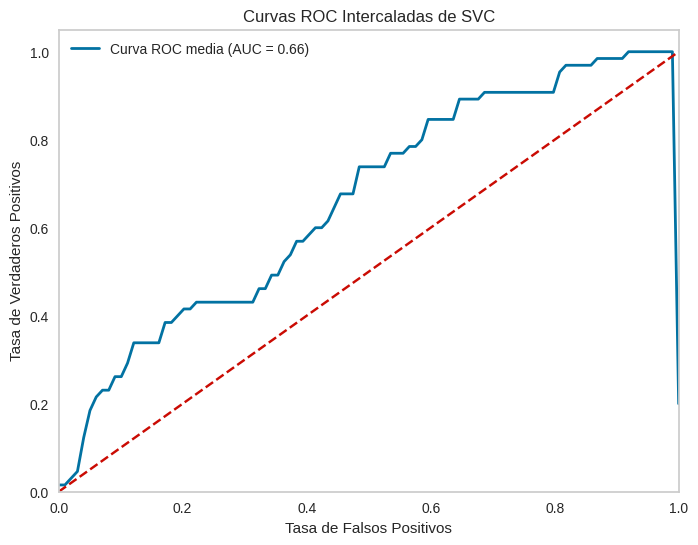

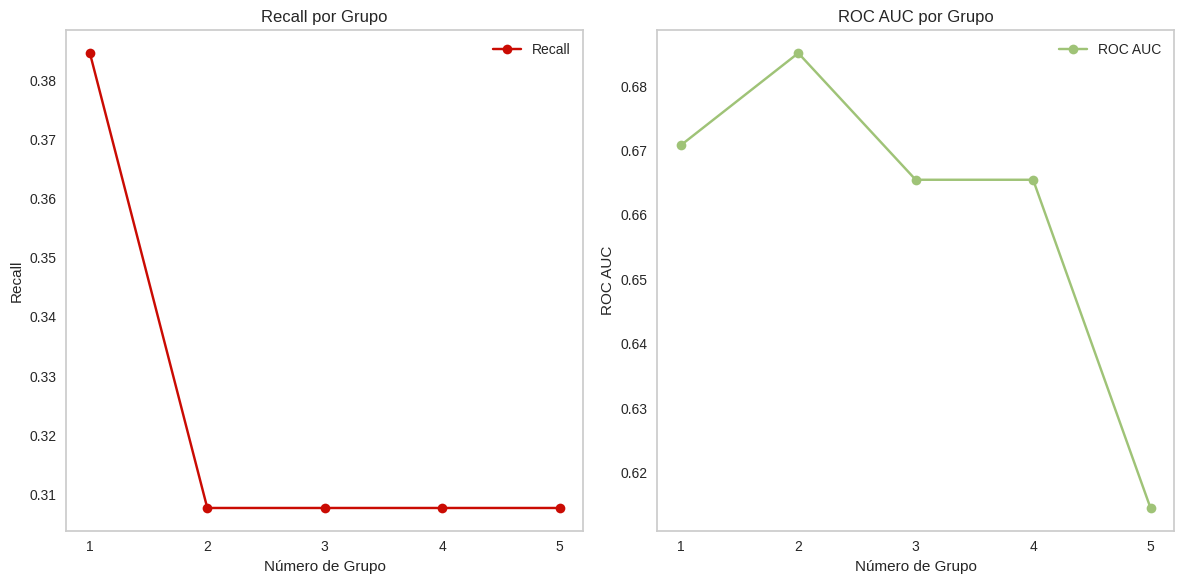


Matriz de confusión para el conjunto de prueba:
[[77  9]
 [ 9  4]]


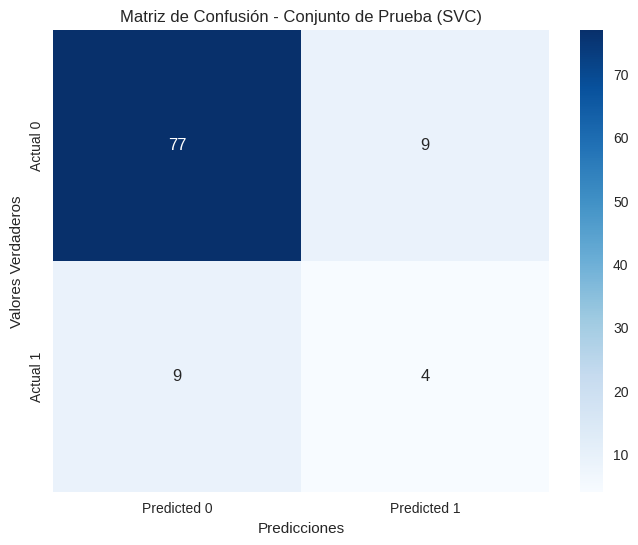


Matriz de confusión para el conjunto de entrenamiento:
[[35  2]
 [ 8 16]]


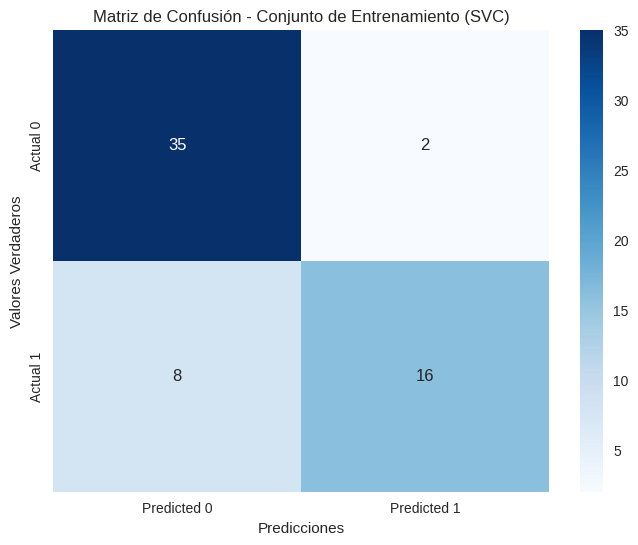

In [ ]:
#svc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

# Modelo SVC
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True,kernel='rbf', C=1, gamma='scale', random_state=42))])
 #                       ('classifier', SVC(probability=True, random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Support Vector Classifier (SVC):")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de SVC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (SVC)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Calcular la matriz de confusión para el conjunto de entrenamiento
y_train_pred = model.predict(X_train_balanced)

final_cm_train = confusion_matrix(y_train_balanced, y_train_pred)

# Mostrar la matriz de confusión para el conjunto de entrenamiento
print("\nMatriz de confusión para el conjunto de entrenamiento:")
print(final_cm_train)

# Visualización de la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Entrenamiento (SVC)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()




Resultados para Support Vector Classifier (SVC):
Promedio Accuracy: 0.74
Promedio ROC AUC: 0.70
Promedio Recall: 0.44
Promedio F1 Score: 0.28
Promedio Precision: 0.21

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.64, ROC AUC: 0.54, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 2 - Accuracy: 0.76, ROC AUC: 0.83, Recall: 0.62, F1 Score: 0.38, Precision: 0.28
Grupo 3 - Accuracy: 0.80, ROC AUC: 0.68, Recall: 0.43, F1 Score: 0.32, Precision: 0.25
Grupo 4 - Accuracy: 0.65, ROC AUC: 0.63, Recall: 0.57, F1 Score: 0.26, Precision: 0.17
Grupo 5 - Accuracy: 0.83, ROC AUC: 0.81, Recall: 0.57, F1 Score: 0.42, Precision: 0.33


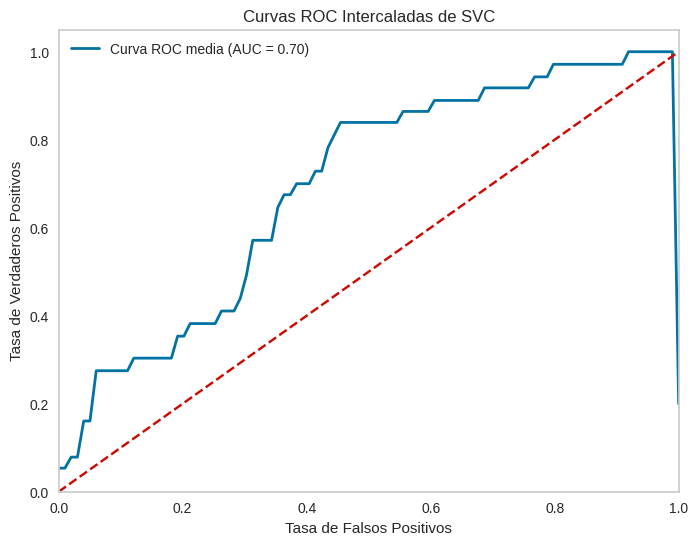

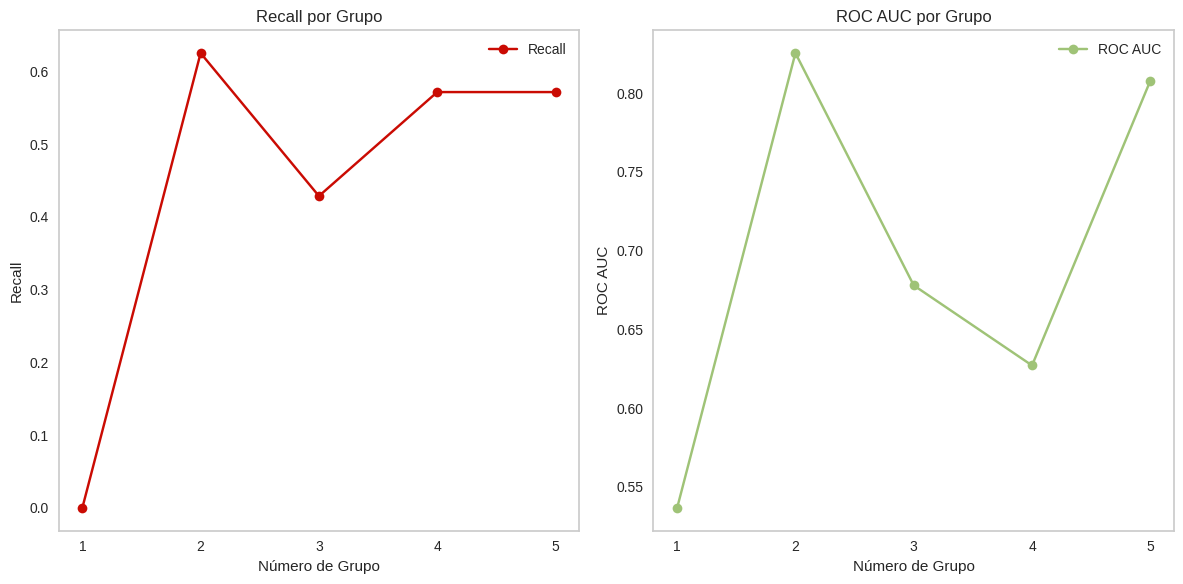


Matriz de confusión para el conjunto de prueba:
[[226  66]
 [ 21  16]]


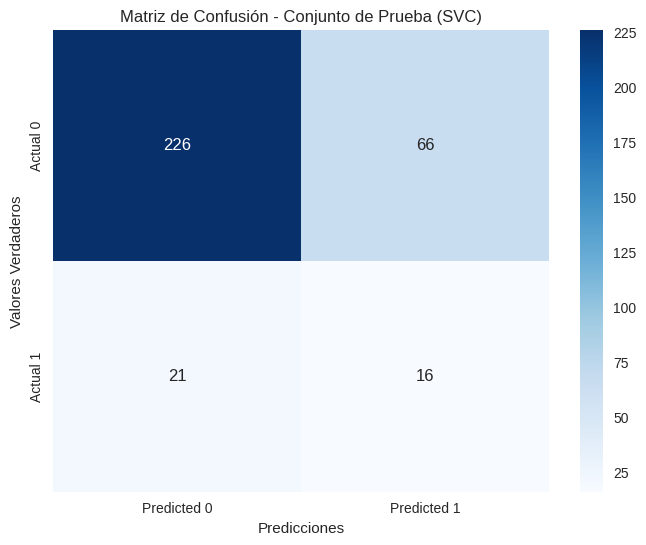

In [ ]:
#con validacion cruzada

scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']


preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos para la validación cruzada
n_groups = 5

# Modelo SVC
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Almacenar FPR y TPR para todas las curvas ROC
all_fpr = np.linspace(0, 1, 100)  # Espacio de valores de FPR
mean_tpr = 0  # Inicializar TPR medio

# Inicializar validación cruzada (StratifiedKFold para mantener la proporción de clases)
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Almacenar todas las predicciones y etiquetas verdaderas para la matriz de confusión
all_y_test = []
all_y_pred = []

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Realizar el balanceo de clases como antes
    X_train_0 = X_train_fold[y_train_fold == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train_fold[y_train_fold == 1]  # Muestras de la clase 1 (minoritaria)

    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train_fold[y_train_fold == 1].copy()

    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train_fold.loc[X_train_0_sampled.index]

    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)

    # Interpolar TPR
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolar la TPR
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

    # Almacenar las predicciones y las etiquetas verdaderas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Calcular la media TPR
mean_tpr /= n_groups

# Calcular y mostrar el promedio de métricas
print("\nResultados para Support Vector Classifier (SVC):")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de SVC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(all_y_test, all_y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (SVC)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



In [ ]:
print("\nResultados de métricas por grupo (incluyendo FPR y Tasa de Error):")
for group_index, result in enumerate(group_results, start=1):
    # Calcular FPR y Tasa de Error para el grupo actual
    cm = confusion_matrix(y_test, model.predict(X_test))  # Matriz de confusión del grupo
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # Tasa de Falsos Positivos
    error_rate = (fp + fn) / len(y_test)  # Tasa de Error

    print(f"Grupo {group_index}:")
    print(f"  - Accuracy:       {result['Accuracy']:.2f}")
    print(f"  - ROC AUC:        {result['ROC AUC']:.2f}")
    print(f"  - Recall (TPR):   {result['Recall']:.2f}")
    print(f"  - FPR:            {fpr:.2f}")
    print(f"  - F1 Score:       {result['F1 Score']:.2f}")
    print(f"  - Precision:      {result['Precision']:.2f}")
    print(f"  - Tasa de Error:  {error_rate:.2f}")
    print("-" * 40)

# Calcular y mostrar promedios generales
print("\nPromedios generales de las métricas:")
print(f"  - Promedio Accuracy:   {np.mean(metrics['accuracy']):.2f}")
print(f"  - Promedio ROC AUC:    {np.mean(metrics['roc_auc']):.2f}")
print(f"  - Promedio Recall:     {np.mean(metrics['recall']):.2f}")
print(f"  - Promedio FPR:        {np.mean([fp / (fp + tn) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")
print(f"  - Promedio F1 Score:   {np.mean(metrics['f1']):.2f}")
print(f"  - Promedio Precision:  {np.mean(metrics['precision']):.2f}")
print(f"  - Promedio Tasa Error: {np.mean([(fp + fn) / len(y_test) for tn, fp, fn, tp in [confusion_matrix(y_test, model.predict(X_test)).ravel()] * n_groups]):.2f}")




Resultados de métricas por grupo (incluyendo FPR y Tasa de Error):
Grupo 1:
  - Accuracy:       0.64
  - ROC AUC:        0.54
  - Recall (TPR):   0.00
  - FPR:            0.22
  - F1 Score:       0.00
  - Precision:      0.00
  - Tasa de Error:  0.22
----------------------------------------
Grupo 2:
  - Accuracy:       0.76
  - ROC AUC:        0.83
  - Recall (TPR):   0.62
  - FPR:            0.22
  - F1 Score:       0.38
  - Precision:      0.28
  - Tasa de Error:  0.22
----------------------------------------
Grupo 3:
  - Accuracy:       0.80
  - ROC AUC:        0.68
  - Recall (TPR):   0.43
  - FPR:            0.22
  - F1 Score:       0.32
  - Precision:      0.25
  - Tasa de Error:  0.22
----------------------------------------
Grupo 4:
  - Accuracy:       0.65
  - ROC AUC:        0.63
  - Recall (TPR):   0.57
  - FPR:            0.22
  - F1 Score:       0.26
  - Precision:      0.17
  - Tasa de Error:  0.22
----------------------------------------
Grupo 5:
  - Accuracy:       0.8

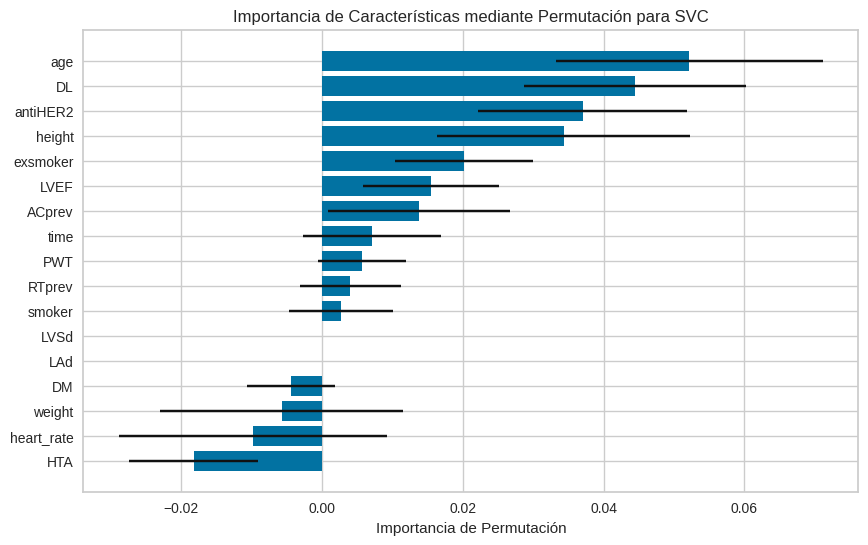

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para SVC")
plt.show()

In [ ]:
#Permutation importance con SVC
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0263 ± 0.0352,age
0.0162 ± 0.0162,smoker
0.0121 ± 0.0236,weight
0.0101 ± 0.0128,RTprev
0.0040 ± 0.0162,height
0.0040 ± 0.0206,DL
0.0020 ± 0.0151,antiHER2
0.0000 ± 0.0128,ACprev
0 ± 0.0000,LAd
0 ± 0.0000,PWT


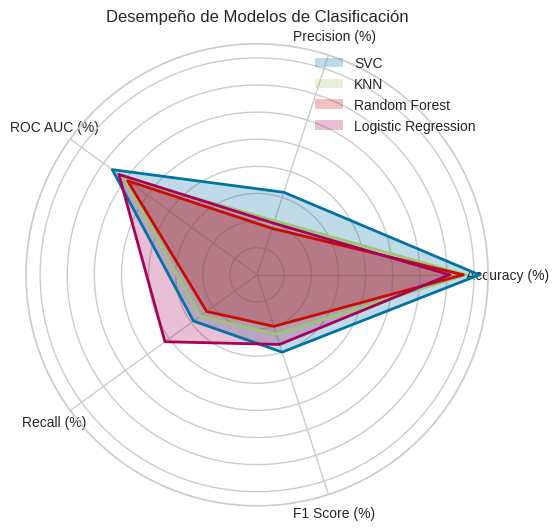

In [ ]:
#Grafico de Radar
models = ['SVC', 'KNN', 'Random Forest', 'Logistic Regression']
metrics = {
    'SVC': [82, 32, 66, 29, 30],
    'KNN': [77, 21, 61, 26, 23],
    'Random Forest': [76, 18, 59, 23, 20],
    'Logistic Regression': [71, 20, 63, 42, 27]
}

# Nombres de las métricas
metric_names = ['Accuracy (%)', 'Precision (%)', 'ROC AUC (%)', 'Recall (%)', 'F1 Score (%)']

# Número de métricas
num_metrics = len(metric_names)

# Calcular el ángulo para cada métrica
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Completar el círculo
angles += angles[:1]  # Cerrar el círculo
data = []

# Llenar los datos con métricas para cada modelo y cerrar el círculo
for model in models:
    model_data = metrics[model] + [metrics[model][0]]  # Cerrar el círculo
    data.append(model_data)

data = np.array(data)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Graficar cada modelo
for i, model in enumerate(models):
    ax.fill(angles, data[i], alpha=0.25, label=model)
    ax.plot(angles, data[i], linewidth=2)

# Añadir etiquetas
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_names)
plt.title('Desempeño de Modelos de Clasificación')
plt.legend(loc='upper right')
plt.show()



In [ ]:
!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
